R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message in install.packages("RWeka", dependencies = "Suggests", repos = NULL, :
“installation of package ‘RWeka’ had non-zero exit status”

In [0]:
library(rfUtilities)

In [0]:
library(FSelector)

ERROR: ignored

In [0]:
library(RWeka)

ERROR: ignored

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message in install.packages("data.table", repos = "http://cran.us.r-project.org"):
“installation of package ‘data.table’ had non-zero exit status”Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [0]:
## Importing packages


library(tidyverse) 

library(MASS)



Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose


Attaching package: ‘naivebayes’

The following object is masked from ‘package:data.tab

In [0]:
data=read.csv("heart.csv")

In [0]:
#Data quality assessment and treatment
str(data)
head(data)
summary(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [0]:
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [0]:
table(data$target)
#table(data$target)
df=data
#table(data)
#EDA
names(data)
heart_data=data


  0   1 
138 165 

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

In [0]:
name <- c("age","sex","chest_pain","rest_bp","chol","fasting_bloodsugar","rest_ecg","max_heartrate","excercise_angina","ST_depression","slope","n_major_vasel","thal","target")
names(heart_data) <- name

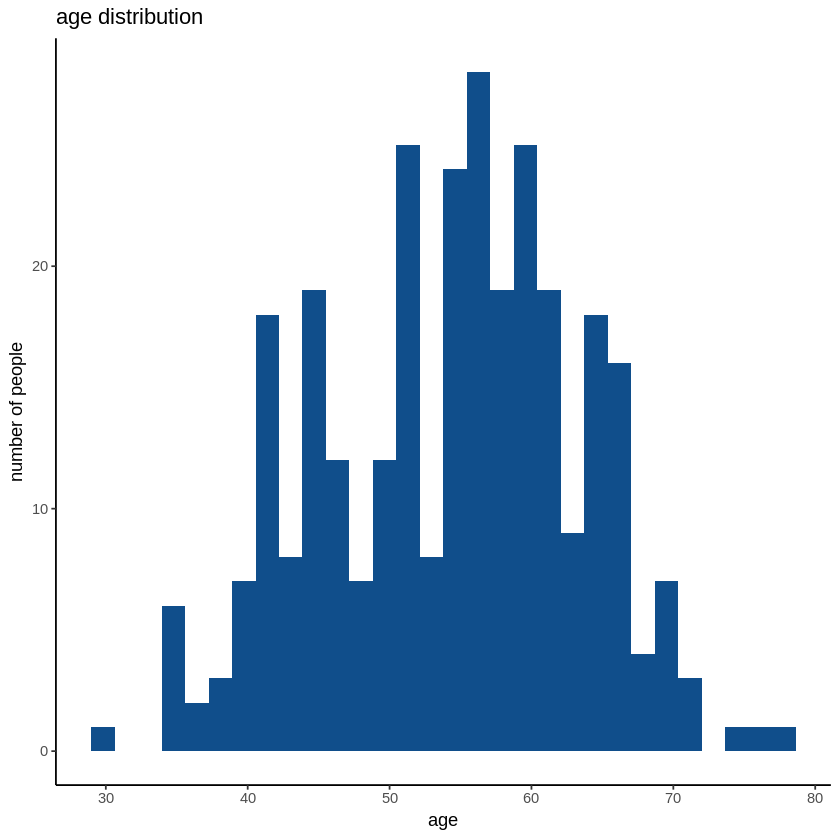

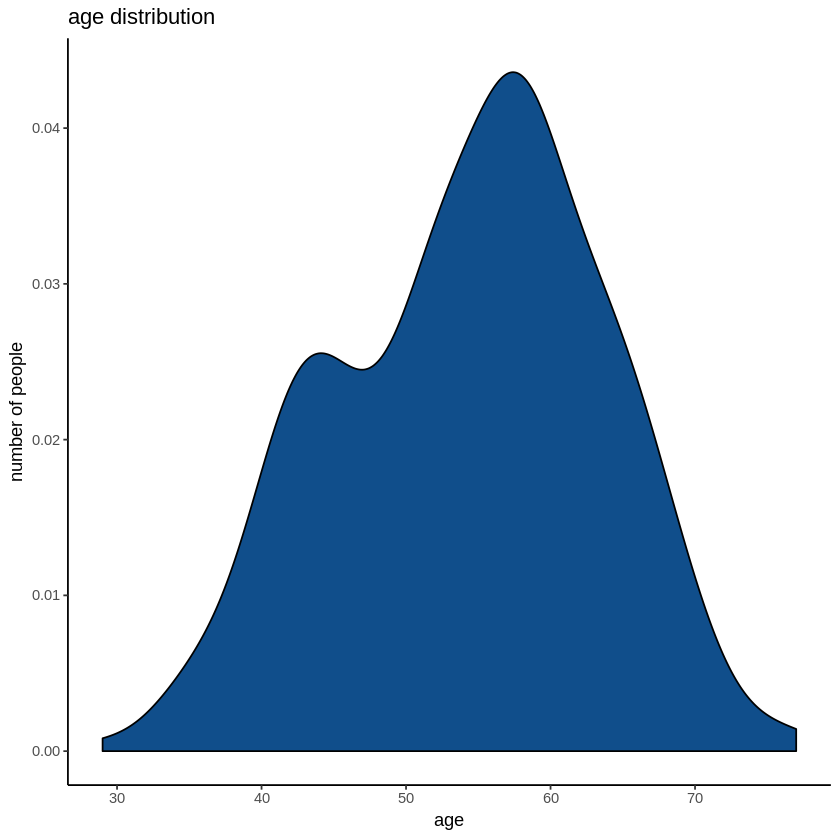

ERROR: ignored

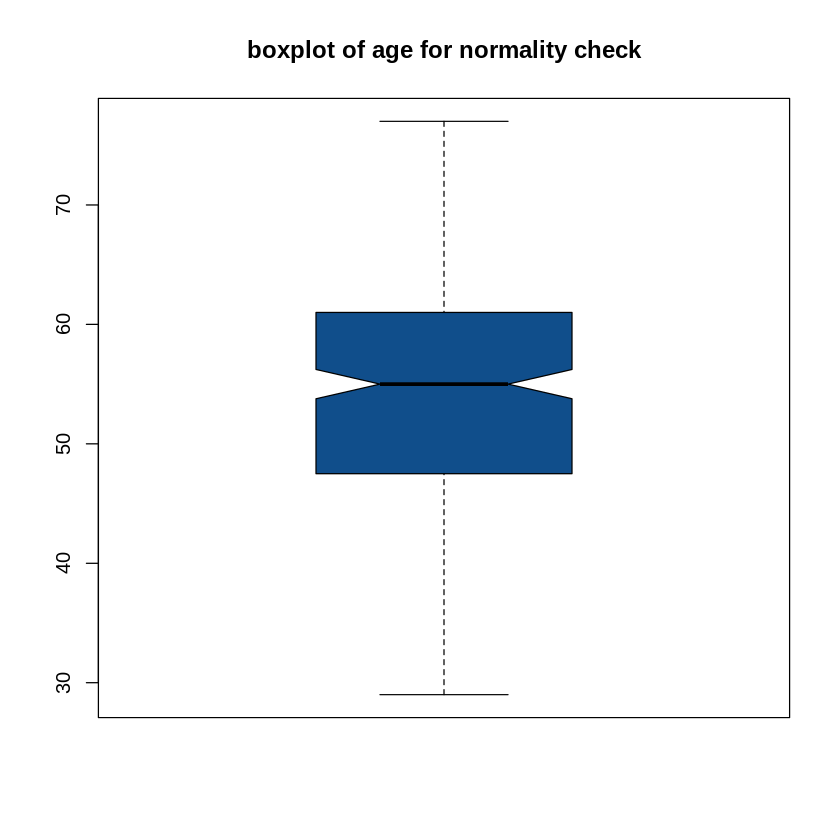

In [0]:
#Exploratory data analysis
ggplot(heart_data,aes(x = age)) + geom_histogram(bins =30,fill ="dodgerblue4") + theme_bw() + theme_classic() +ggtitle("age distribution") +ylab("number of people")
ggplot(heart_data,aes(x = age)) + geom_density(fill ="dodgerblue4") + theme_bw() + theme_classic() +ggtitle("age distribution") +ylab("number of people")
boxplot(heart_data$age,main ="boxplot of age for normality check",col ="dodgerblue4",notch = T)
qqPlot(heart_data$age,main ="normality check for age",grid = F)
#sex 



In [0]:
cor(data, use="complete.obs", method="kendall") 
cov(data, use="complete.obs")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00000000,-0.08227219,-0.07157720,0.20107092,0.13506201,0.094594596,-0.10934872,-0.28000884,0.07442741,0.19326860,-0.14771342,0.27325542,0.070721889,-0.19785657
sex,-0.08227219,1.00000000,-0.05795463,-0.04443840,-0.12410421,0.045031789,-0.04808497,-0.03281701,0.14166381,0.08643658,-0.02433347,0.11219852,0.244163891,-0.28093658
cp,-0.07157720,-0.05795463,1.00000000,0.02754848,-0.06989899,0.083861652,0.06083917,0.24615986,-0.39070764,-0.12508070,0.14579589,-0.18939952,-0.188999273,0.43050575
trestbps,0.20107092,-0.04443840,0.02754848,1.00000000,0.08647408,0.127574040,-0.10514739,-0.02776035,0.04441906,0.10910256,-0.07035979,0.07038749,0.049028452,-0.10206394
chol,0.13506201,-0.12410421,-0.06989899,0.08647408,1.00000000,0.015140102,-0.13266375,-0.03143742,0.07504373,0.03517565,-0.01003916,0.08854863,0.066255382,-0.09913134
fbs,0.09459460,0.04503179,0.08386165,0.12757404,0.01514010,1.000000000,-0.08099556,-0.01174904,0.02566515,0.02434164,-0.04454629,0.12643376,-0.006558573,-0.02804576
restecg,-0.10934872,-0.04808497,0.06083917,-0.10514739,-0.13266375,-0.080995565,1.00000000,0.07248144,-0.07691254,-0.06626249,0.11004233,-0.09154142,-0.010692459,0.14767751
thalach,-0.28000884,-0.03281701,0.24615986,-0.02776035,-0.03143742,-0.011749043,0.07248144,1.00000000,-0.32996460,-0.30684333,0.34970226,-0.19840691,-0.130239408,0.35260931
exang,0.07442741,0.14166381,-0.39070764,0.04441906,0.07504373,0.025665147,-0.07691254,-0.32996460,1.00000000,0.25504178,-0.26704570,0.15229381,0.240554670,-0.43675708
oldpeak,0.19326860,0.08643658,-0.12508070,0.10910256,0.03517565,0.024341637,-0.06626249,-0.30684333,0.25504178,1.00000000,-0.50853895,0.18316639,0.213656261,-0.36173145


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.4845584,-0.416661203,-0.64349879,44.4959019,100.5850764,0.392433283,-0.555012786,-82.90331782,0.41302210,2.214582650,-0.944790506,2.56635630,0.378139138,-1.02134286
sex,-0.4166612,0.217166087,-0.02373615,-0.4639696,-4.7803095,0.007474920,-0.014261360,-0.46987083,0.03101436,0.051993312,-0.008819094,0.05635696,0.059930496,-0.06530719
cp,-0.6434988,-0.023736148,1.06513234,0.8617140,-4.1137740,0.034719035,0.024107709,6.99161804,-0.19116779,-0.178821061,0.076137084,-0.19108037,-0.102200949,0.22332962
trestbps,44.4959019,-0.463969576,0.86171399,307.5864533,111.9672153,1.109042030,-1.052324438,-18.75913055,0.55711101,3.934486263,-1.312831945,1.81837257,0.668021769,-1.26794964
chol,100.5850764,-4.780309488,-4.11377396,111.9672153,2686.4267480,0.245426529,-4.116702730,-11.80049396,1.63199134,3.246793653,-0.128964221,3.73725220,3.135488383,-2.20385548
fbs,0.3924333,0.007474920,0.03471903,1.1090420,0.2454265,0.126876926,-0.015769458,-0.06989706,0.00429480,0.002376893,-0.013146679,0.05025900,-0.006983149,-0.00498328
restecg,-0.5550128,-0.014261360,0.02410771,-1.0523244,-4.1167027,-0.015769458,0.276528315,0.53146242,-0.01747426,-0.035882893,0.030151028,-0.03874063,-0.003857671,0.03599764
thalach,-82.9033178,-0.469870828,6.99161804,-18.7591305,-11.8004940,-0.069897056,0.531462418,524.64640570,-4.07629008,-9.153517802,5.459368785,-4.99323542,-1.352490547,4.81876598
exang,0.4130221,0.031014360,-0.19116779,0.5571110,1.6319913,0.004294800,-0.017474264,-4.07629008,0.22070684,0.157215920,-0.074618058,0.05560291,0.059471510,-0.10235394
oldpeak,2.2145827,0.051993312,-0.17882106,3.9344863,3.2467937,0.002376893,-0.035882893,-9.15351780,0.15721592,1.348095207,-0.413218805,0.26439578,0.149462330,-0.24945249


In [0]:
install.packages("PerformanceAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’



Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:data.table’:

    first, last

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘PerformanceAnalytics’

The following objects are masked from ‘package:e1071’:

    kurtosis, skewness

The following object is masked from ‘package:graphics’:

    legend



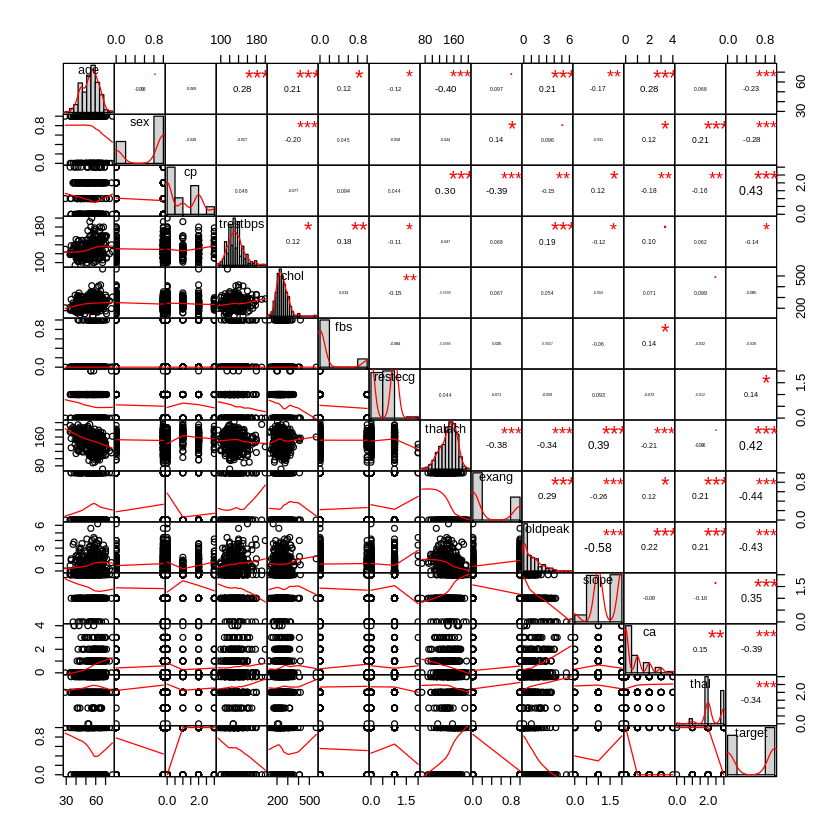

In [0]:
library("PerformanceAnalytics")
chart.Correlation(data, histogram=TRUE, pch=19)

In [0]:
#col<- colorRampPalette(c("blue", "white", "red"))(20)
#heatmap(x = data, col = col, symm = TRUE)

ERROR: ignored


  0   1   2   3 
143  50  87  23 

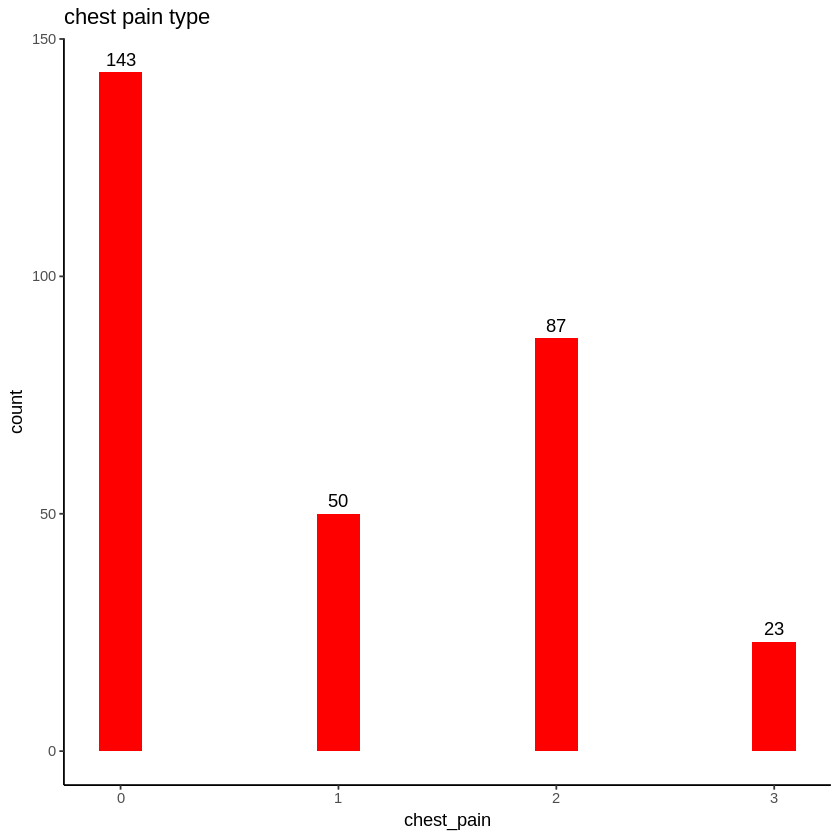

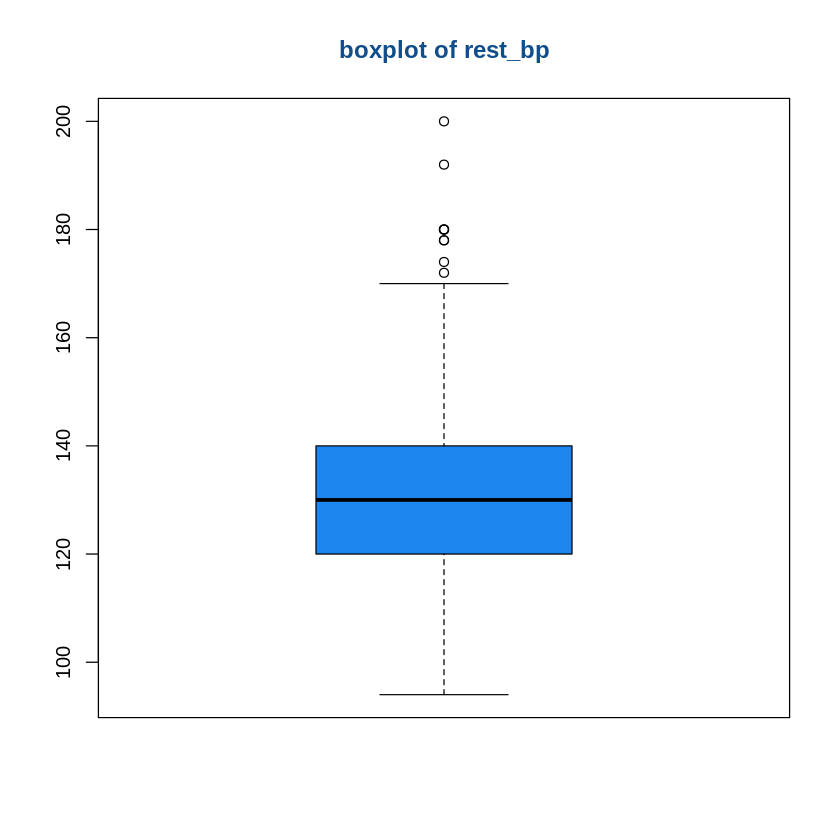

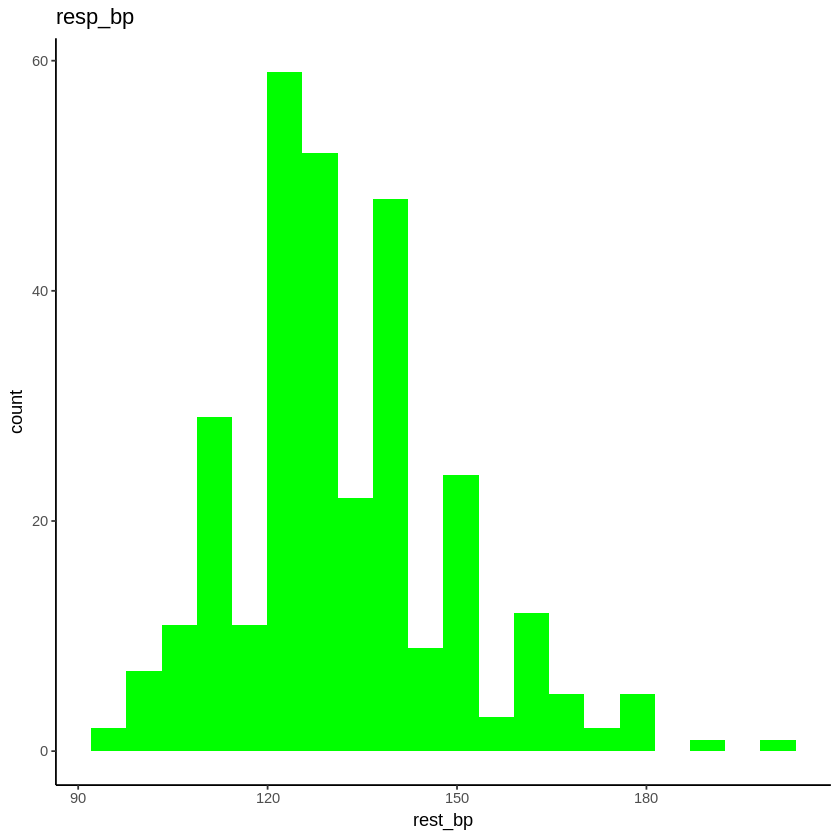

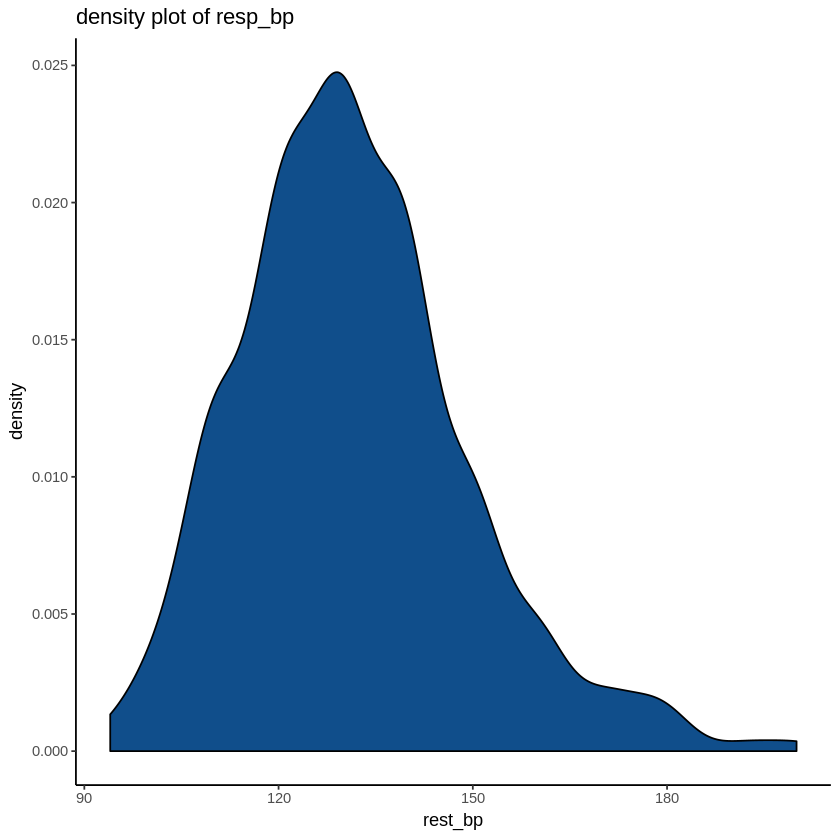

In [0]:
#ggplot(heart_data,aes(x =sex)) + geom_bar(width = 0.2,fill ="green") + geom_text(stat = 'count',aes(label =..count..),vjust =-0.5) + theme_bw() + theme_classic() +ylab("number of count") + ggtitle("sex") 

table(heart_data$chest_pain)
ggplot(heart_data,aes(x = chest_pain)) + geom_bar(width =0.2,fill ="red") + geom_text(stat = 'count',aes(label =..count..),vjust = -0.5)  + theme_bw()+theme_classic() + ggtitle("chest pain type") 
#rest_bp
boxplot(heart_data$rest_bp,col = "dodgerblue2",main ="boxplot of rest_bp",col.main="dodgerblue4")
ggplot(heart_data,aes(rest_bp)) + geom_histogram(bins =20,fill ="green") +theme_bw() + theme_classic() +ggtitle("resp_bp") 
ggplot(heart_data,aes(rest_bp)) + geom_density(fill ="dodgerblue4") + theme_bw() + theme_classic()+ggtitle("density plot of resp_bp")


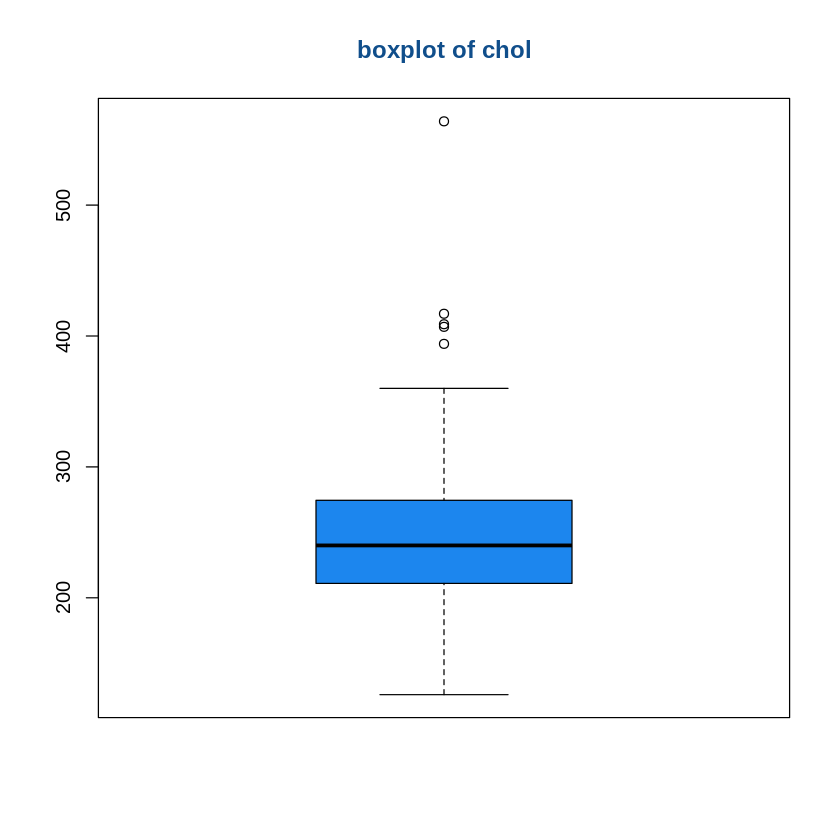

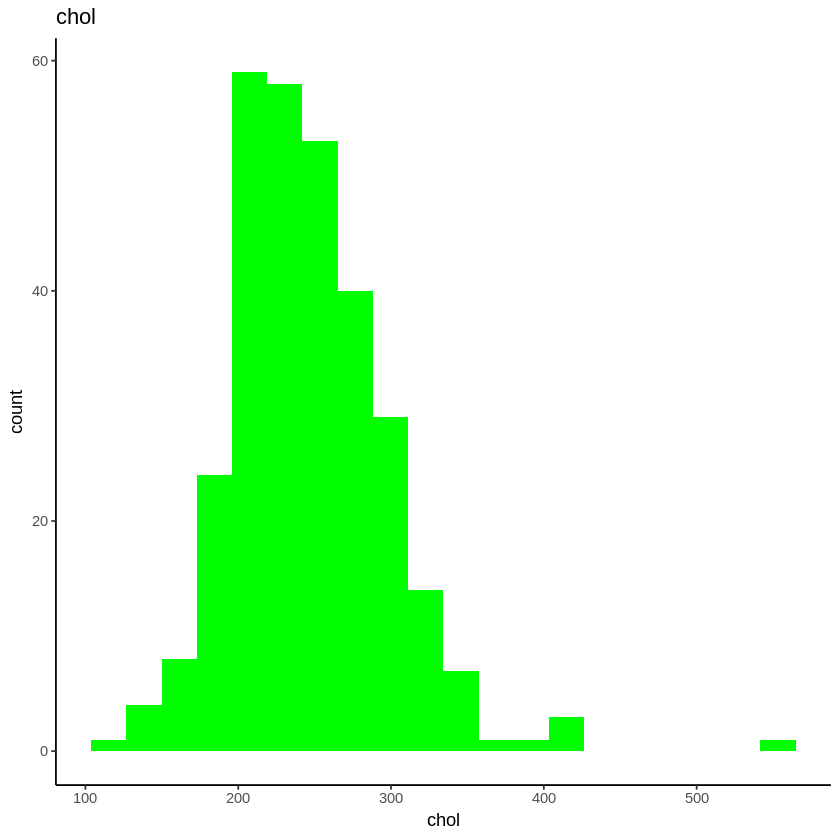


  0   1 
258  45 

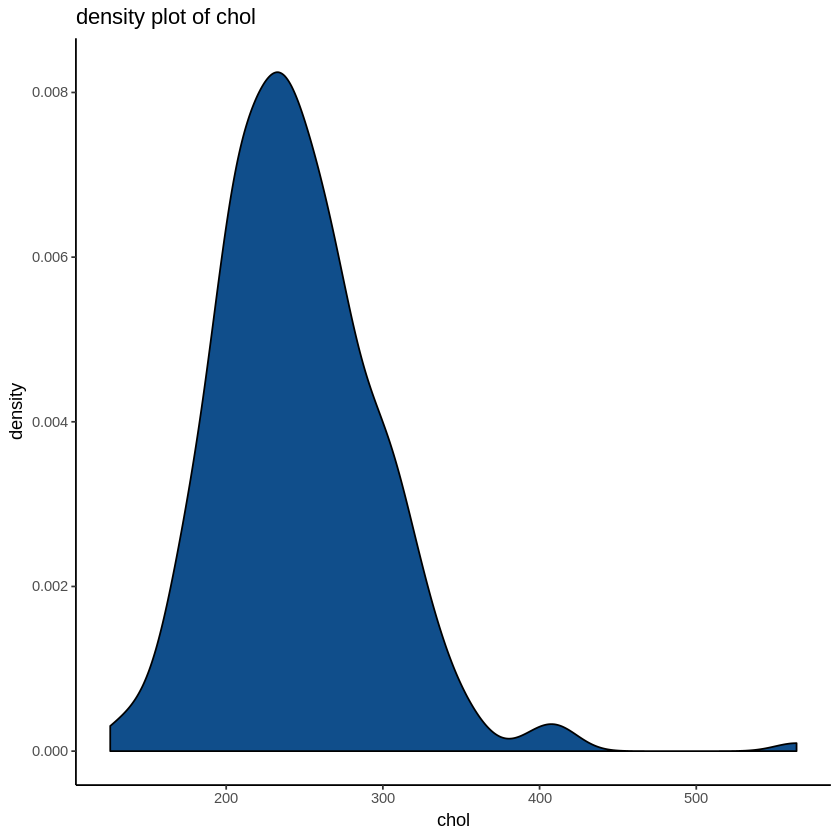

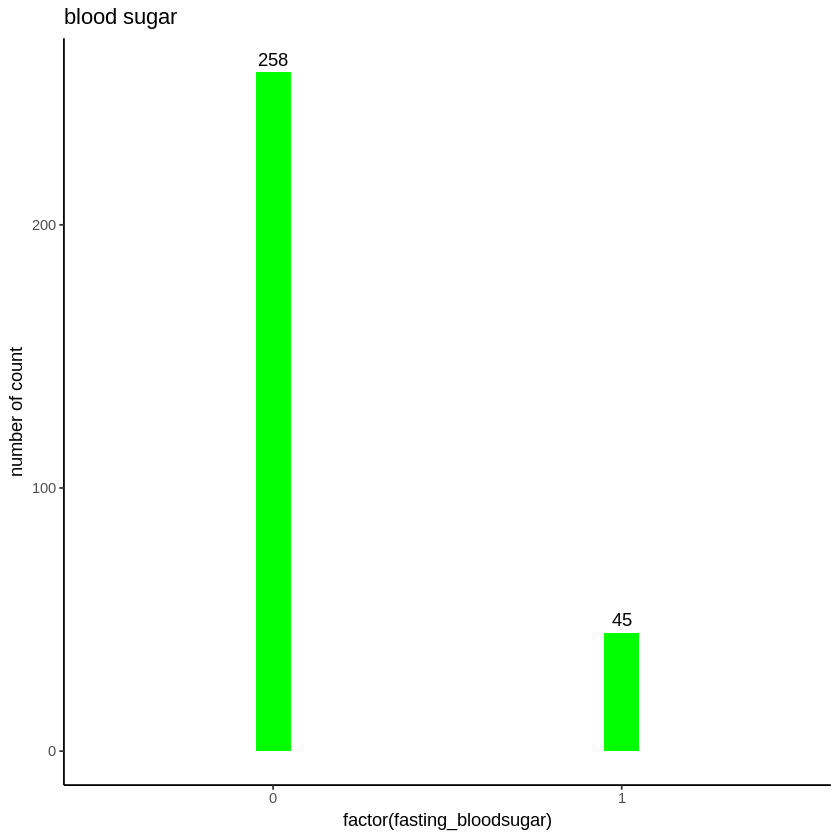

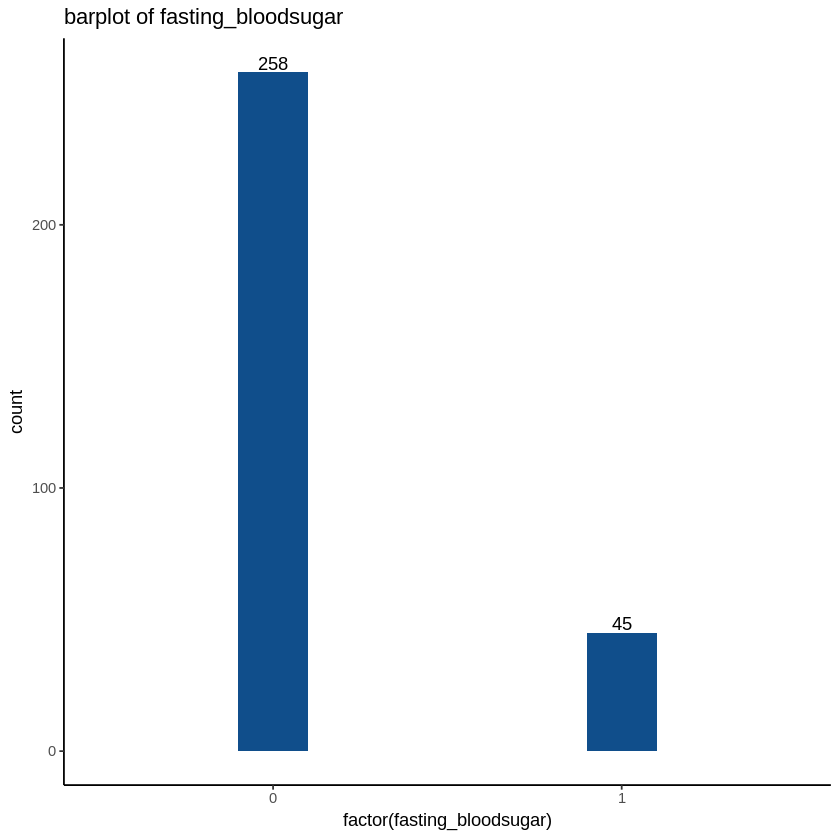

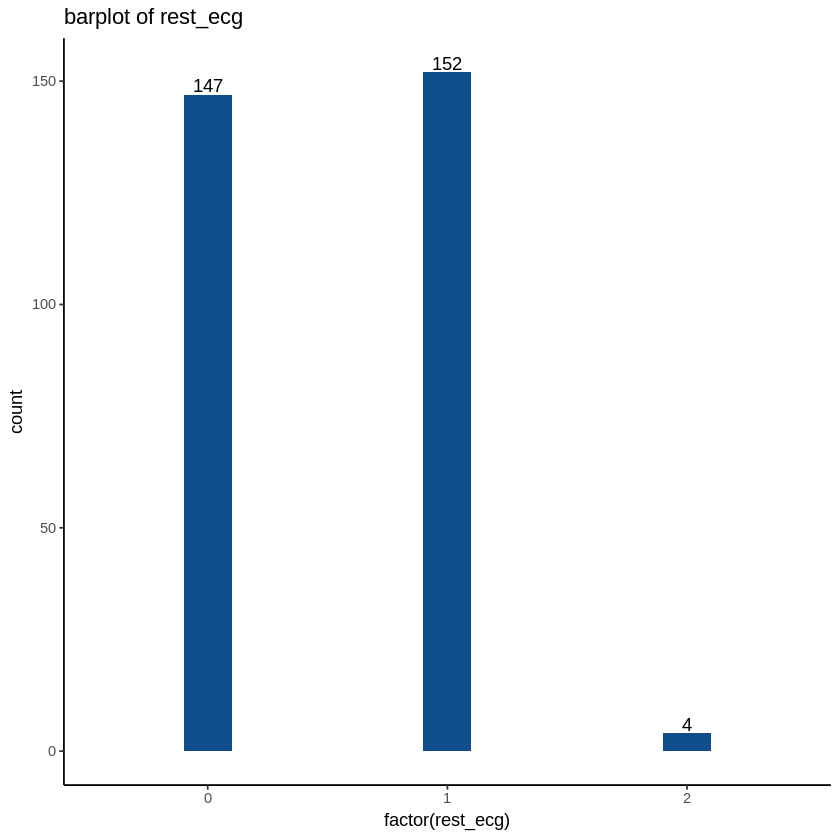

In [0]:

#chol
boxplot(heart_data$chol,col = "dodgerblue2",main ="boxplot of chol",col.main="dodgerblue4")
ggplot(heart_data,aes(chol)) + geom_histogram(bins =20,fill ="green") +theme_bw() + theme_classic() +ggtitle("chol") 
ggplot(heart_data,aes(chol)) + geom_density(fill ="dodgerblue4") + theme_bw() + theme_classic()+ggtitle("density plot of chol") 
table(heart_data$fasting_bloodsugar)
ggplot(heart_data,aes(x =factor(fasting_bloodsugar))) + geom_bar(width = 0.1,fill ="green") + geom_text(stat = 'count',aes(label =..count..),vjust =-0.5) + theme_bw() + theme_classic() +ylab("number of count") + ggtitle("blood sugar") 
ggplot(heart_data,aes(factor(fasting_bloodsugar))) + geom_bar(width = 0.2,fill ="dodgerblue4") + theme_bw() + theme_classic()+geom_text(stat ='count',aes(label =..count..),vjust =-0.2)+ggtitle("barplot of fasting_bloodsugar") 

ggplot(heart_data,aes(factor(rest_ecg))) + geom_bar(width = 0.2,fill ="dodgerblue4") + theme_bw() + theme_classic()+geom_text(stat ='count',aes(label =..count..),vjust =-0.2)+ggtitle("barplot of rest_ecg") 



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


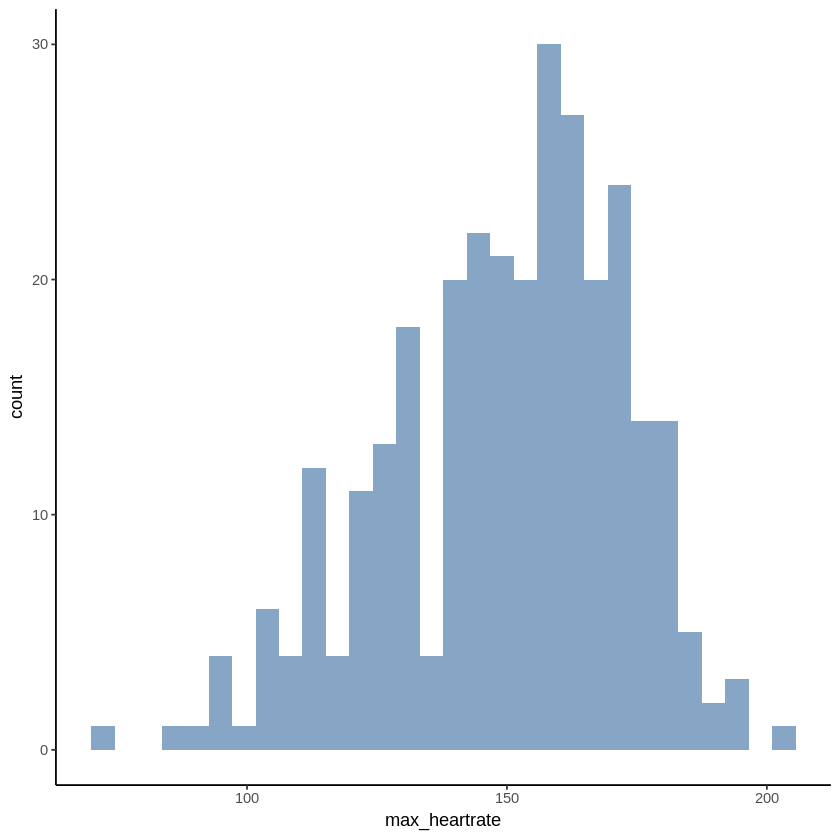

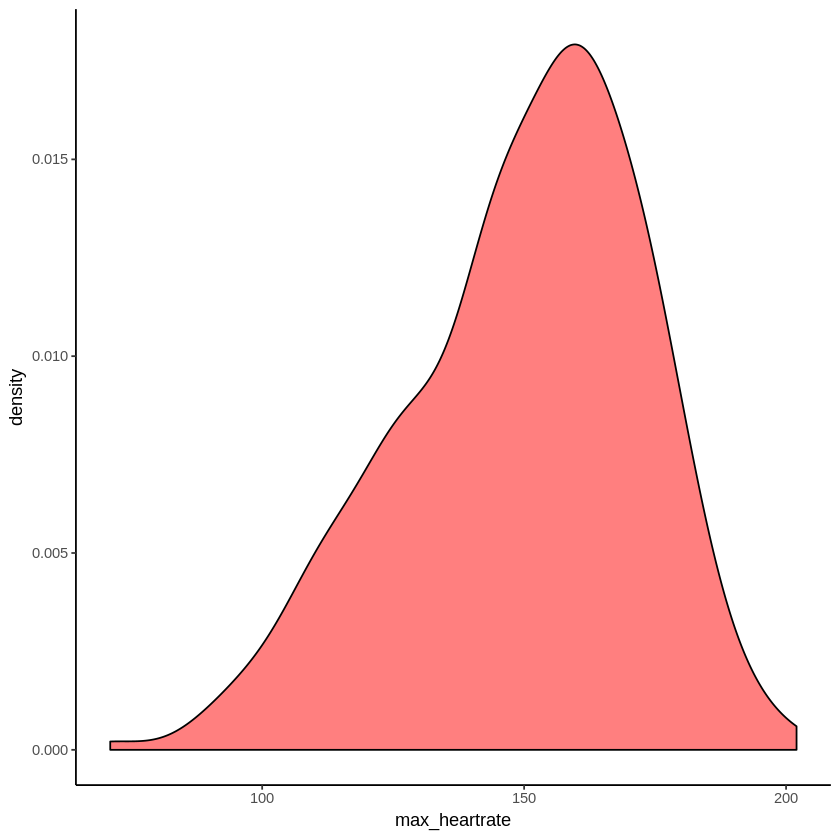

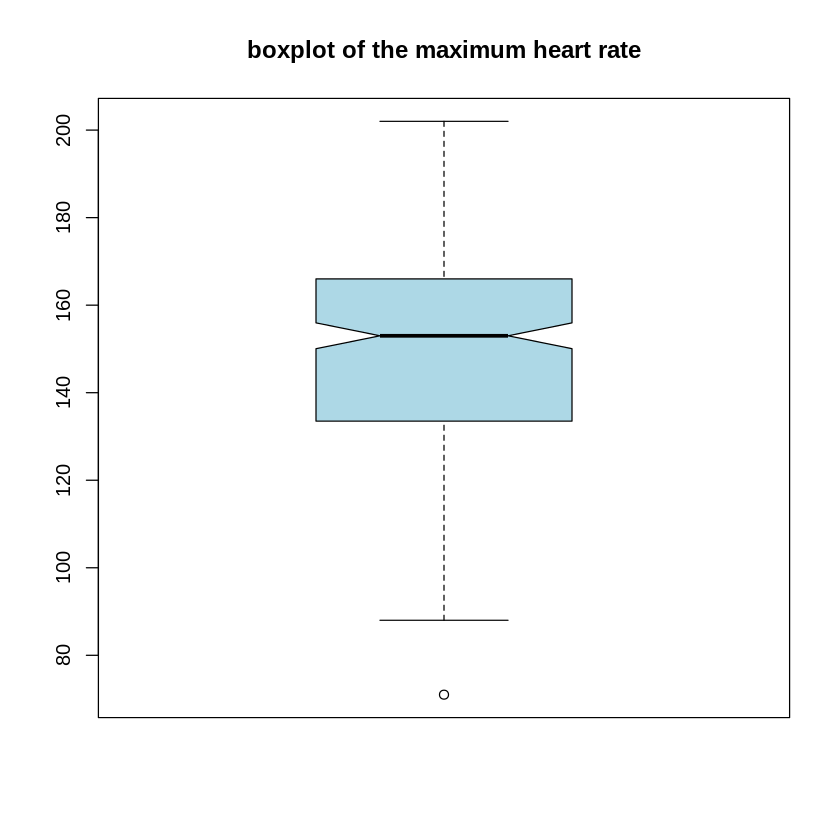

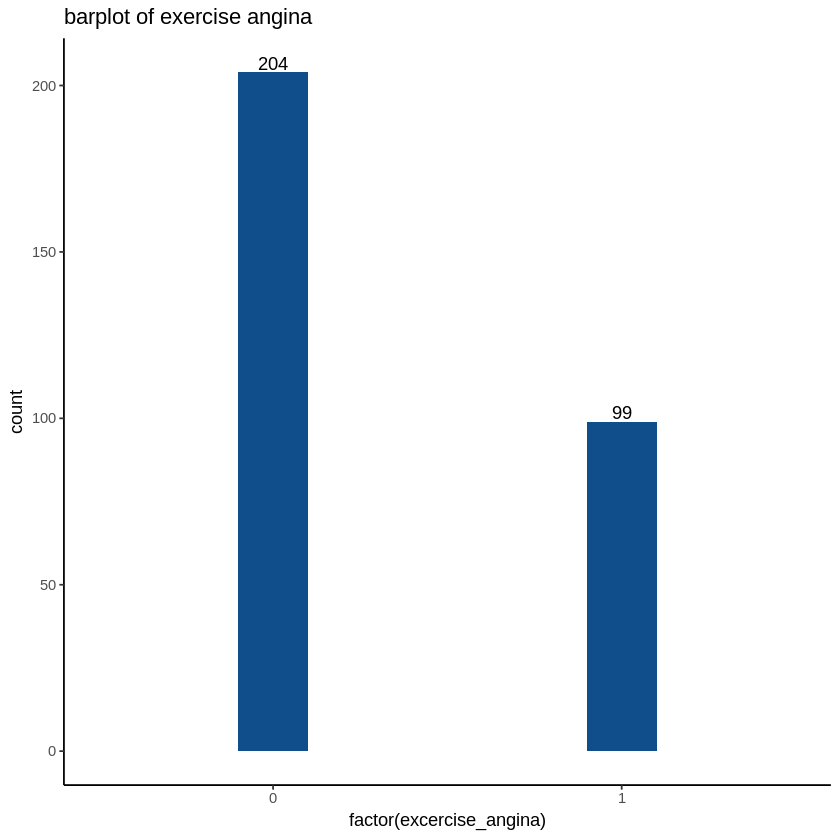

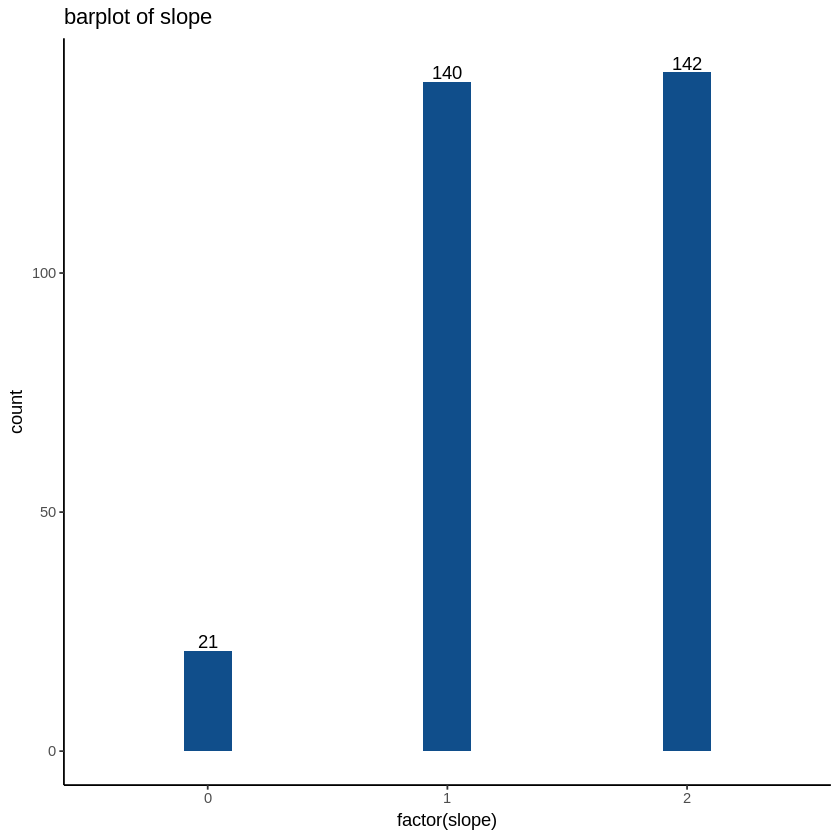

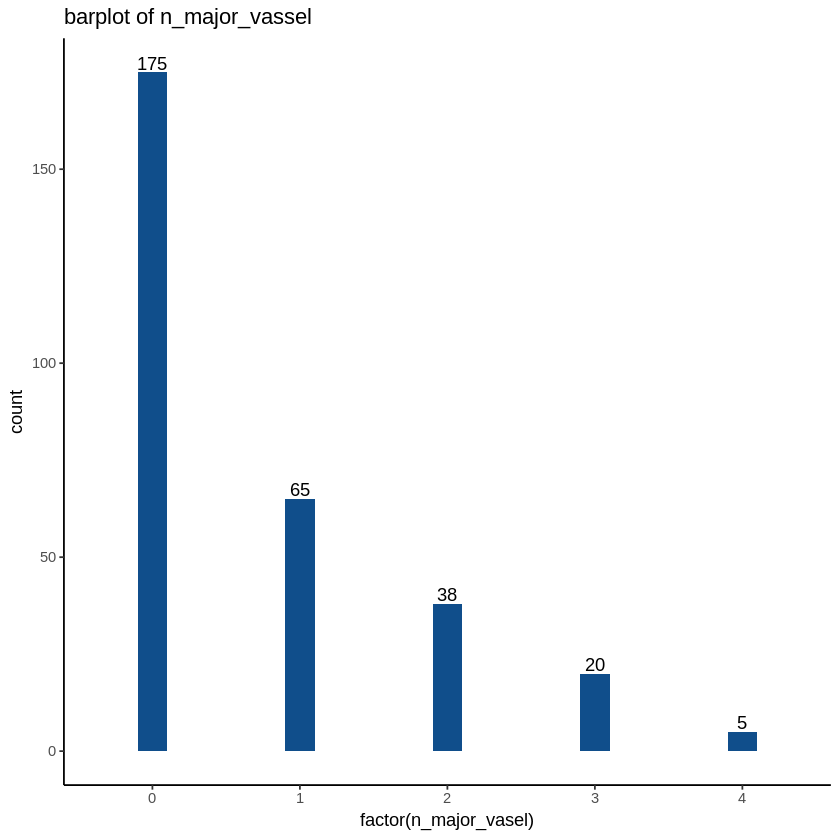

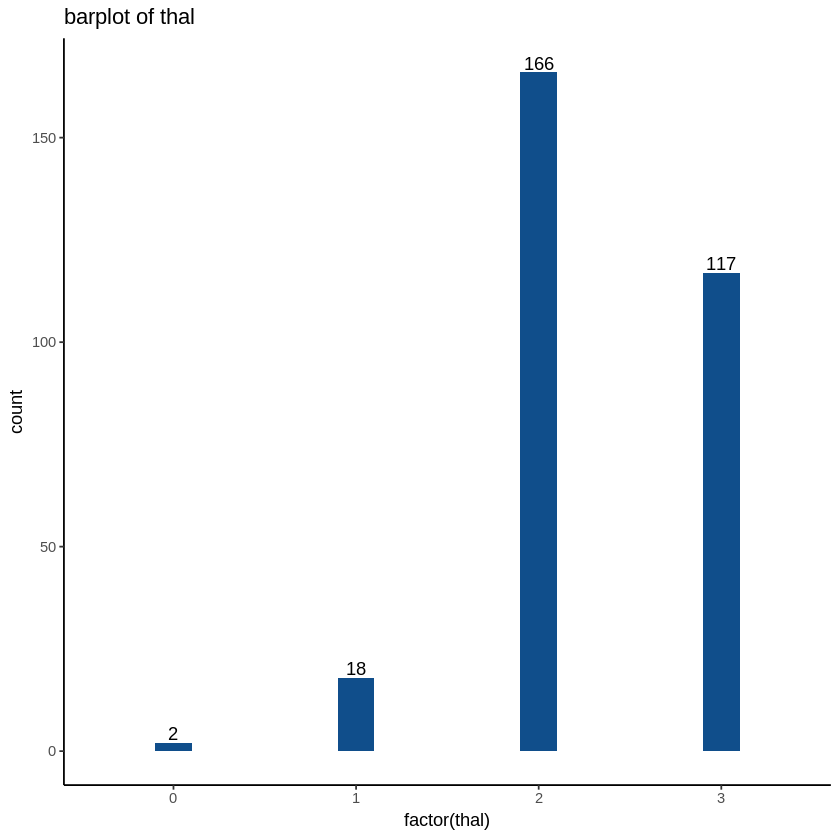

In [0]:
#max heart-rate
ggplot(heart_data,aes(max_heartrate)) + geom_histogram(fill = "dodgerblue4",alpha =0.5) + theme_bw()+theme_classic()
ggplot(heart_data,aes(max_heartrate)) + geom_density(fill = "red",alpha =0.5) + theme_bw()+theme_classic()
boxplot(heart_data$max_heartrate,col ="lightblue",notch = T,main ="boxplot of the maximum heart rate")

ggplot(heart_data,aes(factor(excercise_angina))) + geom_bar(width = 0.2,fill ="dodgerblue4") + theme_bw() + theme_classic()+geom_text(stat ='count',aes(label =..count..),vjust =-0.2)+ggtitle("barplot of exercise angina") 


ggplot(heart_data,aes(factor(slope))) + geom_bar(width = 0.2,fill ="dodgerblue4") + theme_bw() + theme_classic()+geom_text(stat ='count',aes(label =..count..),vjust =-0.2)+ggtitle("barplot of slope") 

ggplot(heart_data,aes(factor(n_major_vasel))) + geom_bar(width = 0.2,fill ="dodgerblue4") + theme_bw() + theme_classic()+geom_text(stat ='count',aes(label =..count..),vjust =-0.2)+ggtitle("barplot of n_major_vassel") 

ggplot(heart_data,aes(factor(thal))) + geom_bar(width = 0.2,fill ="dodgerblue4") + theme_bw() + theme_classic()+geom_text(stat ='count',aes(label =..count..),vjust =-0.2)+ggtitle("barplot of thal")

In [0]:
str(heart_data)

In [0]:
#For Accuracy Checking
mcc <- function (act, pred){
  TP <- sum(act == 1 & pred == 1)
  TN <- sum(act == 0 & pred == 0)
  FP <- sum(act == 0 & pred == 1)
  FN <- sum(act == 1 & pred == 0)
  
  denom <- as.double(TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)
  if (any((TP+FP) == 0, (TP+FN) == 0, (TN+FP) == 0, (TN+FN) == 0)) denom <- 1
  mcc <- ((TP*TN)-(FP*FN)) / sqrt(denom)
  return(paste(round(mcc*100,1),"%"))
}
mmc_text <- "Matthews correlation coefficient score:"


In [0]:
attrEval(target~.,data=heart_data,estimator = "InfGain")

information.gain(target~.,heart_data)

Changing dependent variable to factor with levels: 0 1 


Warning message in attrEval(target ~ ., data = heart_data, estimator = "InfGain"):
“Possibly this is an error caused by regression formula and classification attribute estimator or vice versa.”

age                sex         chest_pain            rest_bp 
      0.0601665235       0.0591383086       0.2012524899       0.0155132733 
              chol fasting_bloodsugar           rest_ecg      max_heartrate 
      0.0174925263       0.0005658824       0.0184859198       0.1296518645 
  excercise_angina      ST_depression              slope      n_major_vasel 
      0.1422104940       0.1239665130       0.1156923875       0.1617429442 
              thal 
      0.1770407804

ERROR: ignored

In [0]:
heart_data=heart_data[,-6]

smp_size <- floor(0.75 * nrow(heart_data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(heart_data)), size = smp_size)

train <- heart_data[train_ind, ]
test <- heart_data[-train_ind, ]

In [0]:
##########Logistic Regression

#Model creation, testing and validation. Comparison of performance if multiple models are fit

# define training control
train_control <- trainControl(method = "cv", number = 10)

# train the model on training set
model <- train(target ~ .,
               data = train,
               trControl = train_control,
               method = "glm",
               family=binomial())

# print cv scores
summary(model)
out=test$target
names(test)
test=test[,-13]
names(test)
pred=predict(model,test)
predicted.class1 <- ifelse(pred>0.5,1,0)
mean(predicted.class1==out)

write.csv(pred,"OUTPUT.csv")

out.glm=100*mean(predicted.class1==out)

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3232  -0.3877   0.1469   0.5619   2.5482  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       4.839466   2.960048   1.635 0.102064    
age              -0.013244   0.027089  -0.489 0.624923    
sex              -1.512099   0.550554  -2.747 0.006023 ** 
chest_pain        0.804131   0.204865   3.925 8.67e-05 ***
rest_bp          -0.024308   0.011536  -2.107 0.035111 *  
chol             -0.002852   0.004503  -0.633 0.526449    
rest_ecg          0.746853   0.416400   1.794 0.072878 .  
max_heartrate     0.026060   0.012426   2.097 0.035972 *  
excercise_angina -1.177767   0.478472  -2.462 0.013835 *  
ST_depression    -0.723183   0.251534  -2.875 0.004039 ** 
slope             0.209550   0.423943   0.494 0.621102    
n_major_vasel    -0.619736   0.213398  -2.904 0.003683 ** 
thal             -1.191923   0.353458  -3.372 0.000746 ***
---
Signif. codes:  0 ‘***’ 0.001

[1] "age"              "sex"              "chest_pain"       "rest_bp"         
 [5] "chol"             "rest_ecg"         "max_heartrate"    "excercise_angina"
 [9] "ST_depression"    "slope"            "n_major_vasel"    "thal"            
[13] "target"

[1] "age"              "sex"              "chest_pain"       "rest_bp"         
 [5] "chol"             "rest_ecg"         "max_heartrate"    "excercise_angina"
 [9] "ST_depression"    "slope"            "n_major_vasel"    "thal"

[1] 0.8157895

In [0]:
##############Naive Bayes
names(train)
val=data.frame(age=as.character(heart_data$age),sex=as.character(heart_data$sex),
               chest_pain=as.character(heart_data$chest_pain),rest_bp=as.character(heart_data$rest_bp),
               chol=as.character(heart_data$chol),rest_ecg=as.character(heart_data$rest_ecg),
               max_heartrate=as.character(heart_data$max_heartrate),
               excercise_angina=as.character(heart_data$excercise_angina),
               ST_depression=as.character(heart_data$ST_depression),slope=as.character(heart_data$slope),
               n_major_vasel=as.character(heart_data$n_major_vasel),thal=as.character(heart_data$thal),
               target=as.character(heart_data$target))

smp_size <- floor(0.75 * nrow(val))


set.seed(123)
train_ind <- sample(seq_len(nrow(val)), size = smp_size)

train <- val[train_ind, ]
test <- val[-train_ind, ]

y=as.factor(train$target)
#Naive Bayes
fit <- train(
  train[,-13], y, method = "nb", 
  trControl = trainControl(method = "cv", number = 10))

mean(test$target==predict(fit,test[,-13]))
nb.prediction <- predict(fit,test[,-13])
confusion.matrix <- table(test$target, nb.prediction)
print(confusion.matrix)
accuracy.percent <- 100*sum(diag(confusion.matrix))/sum(confusion.matrix)
print(paste("accuracy:",accuracy.percent,"%"))
write.csv(nb.prediction,"NAIVE_BAYES_OUTPUT.csv")

out.nb=accuracy.percent

[1] "age"              "sex"              "chest_pain"       "rest_bp"         
 [5] "chol"             "rest_ecg"         "max_heartrate"    "excercise_angina"
 [9] "ST_depression"    "slope"            "n_major_vasel"    "thal"            
[13] "target"

1 package is needed for this model and is not installed. (klaR). Would you like to try to install it now?

ERROR: ignored

In [0]:
############Decision Tree

smp_size <- floor(0.75 * nrow(heart_data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(heart_data)), size = smp_size)

train <- heart_data[train_ind, ]
test <- heart_data[-train_ind, ]

#

# define training control
# train_control <- trainControl(method = "cv", number = 10)


model=rpart(target~.,data = train, method="class")
summary(model)
rcart.prediction <- predict(model, newdata=test[,-13], type="class")
confusion.matrix <- table(test$target, rcart.prediction)
print(confusion.matrix)
accuracy.percent <- 100*sum(diag(confusion.matrix))/sum(confusion.matrix)
print(paste("accuracy:",accuracy.percent,"%"))

write.csv(rcart.prediction,"Decision_Tree_output.csv")

out.dtree=accuracy.percent

Call:
rpart(formula = target ~ ., data = train, method = "class")
  n= 227 

          CP nsplit rel error    xerror       xstd
1 0.46601942      0 1.0000000 1.0000000 0.07282480
2 0.04368932      1 0.5339806 0.6310680 0.06612475
3 0.03883495      3 0.4466019 0.6019417 0.06517599
4 0.01941748      5 0.3689320 0.5436893 0.06305825
5 0.01000000      6 0.3495146 0.5145631 0.06188172

Variable importance
            thal    max_heartrate       chest_pain              age 
              30               13               13               11 
   n_major_vasel    ST_depression excercise_angina          rest_bp 
               9                9                5                4 
        rest_ecg             chol            slope 
               3                2                1 

Node number 1: 227 observations,    complexity param=0.4660194
  predicted class=1  expected loss=0.4537445  P(node) =1
    class counts:   103   124
   probabilities: 0.454 0.546 
  left son=2 (92 obs) right son=3 

In [0]:
#Random Forest

library(rfUtilities)

## Not run: 

#train.vars <- as.matrix(select(train,-target))
#test.vars <- as.matrix(select(test,-target))
#rf <- randomForest(train.vars,as.factor(train$target))
#result.rf <- mcc(predict(rf,newdata=test.vars),test$target)
#result.rf

#result.rf <- mcc(rf.prediction,test$target)


library(randomForest)

rf_gridsearch <- randomForest(target~., data=train, ntree=500)


#mcc(predict(rf_gridsearch,newdata=test)>0.5,test$target)
rf.prediction <- predict(rf_gridsearch,newdata=test)>0.5
confusion.matrix <- table(test$target, rf.prediction)
print(confusion.matrix)
accuracy.percent <- 100*sum(diag(confusion.matrix))/sum(confusion.matrix)
print(paste("accuracy:",accuracy.percent,"%"))
out.rf=accuracy.percent

write.csv(rf.prediction,"Random_forest_output.csv")


ERROR: ignored

In [0]:
#Support Vector Machine with the help of k fold cross validation
library(caret)
ctrl <- trainControl(method = "cv", savePred=T)
mod <- train(target~., data=train, method = "svmLinear", trControl = ctrl)
summary(mod)
svm.prediction <- predict(mod,newdata=test)>0.5
confusion.matrix <- table(test$target, svm.prediction)
print(confusion.matrix)
accuracy.percent <- 100*sum(diag(confusion.matrix))/sum(confusion.matrix)
print(paste("accuracy:",accuracy.percent,"%"))
out.svm=accuracy.percent

write.csv(svm.prediction,"SVM_output.csv")

1 package is needed for this model and is not installed. (kernlab). Would you like to try to install it now?

ERROR: ignored

In [0]:
train.vars <- as.matrix(train[,-13])
test.vars <- as.matrix(test[,-13])

In [0]:
#XGBoost Algorithm

xg <- xgboost(data=train.vars,label=train$target,nrounds=10)
#result.xg  <- mcc(predict(xg,newdata=test.vars)>0.5,test$target) 
#result.xg

xgb.prediction <- predict(xg,newdata=test.vars)>0.5
confusion.matrix <- table(test$target, xgb.prediction)
print(confusion.matrix)
accuracy.percent <- 100*sum(diag(confusion.matrix))/sum(confusion.matrix)
print(paste("accuracy:",accuracy.percent,"%"))
out.xg=xgb.prediction


write.csv(xgb.prediction,"XGB_output.csv")

In [0]:
#Solutions for the required objectives
result.values <- c(out.glm,out.nb,out.dtree,out.rf,out.svm,out.xg)
results.names <- c("Logistic Regression", "Naive Bayes", "Decision Tree","Random Forest","Support Vector Machinve",
                   "extreme gradient boosting")

results <- data.table(method=results.names,
                      mcc=result.values)


#Graphical representation of key findings
ggplot(results,aes(method,mcc))+
  geom_bar(stat="identity")+
  theme_economist()+
  labs(title="Results by MCC Score",
       y="MCC Score")+
  coord_flip()
